# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [46]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [47]:
new = pd.read_excel(r"C:\Users\sneha\Downloads\snehalksh4.xlsx")

new

,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider,Average_parking_rate_month
0,1,190400,15,1790000,6200,50
1,2,191200,15,1780000,6400,60
2,3,177600,25,1778000,6500,60
3,4,176800,25,1750000,6550,60
4,5,178400,25,1740000,6580,70
5,6,180800,25,1725000,8200,75
6,7,175200,30,1725000,8600,75
7,8,174400,30,1720000,8800,75
8,9,173920,30,1705000,9200,80
9,10,172800,30,1710000,9630,80


In [48]:
new.columns

Index(['City', 'Number_of_weekly_riders', 'price_per_week',
       'Population_of_city', 'Monthly_income_of_rider',
       'Average_parking_rate_month'],
      dtype='object')

In [49]:
# Let's look at some statistical information about our dataframe.
new.describe() 

,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider,Average_parking_rate_month
count,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.000000
mean,13.500000,158796.307692,51.269231,1.675500e+06,11265.692308,109.230769
std,7.648529,20722.454493,27.261046,6.468462e+04,3315.054470,44.759185
min,1.000000,115696.000000,15.000000,1.590000e+06,6200.000000,50.000000
25%,7.250000,149200.000000,30.000000,1.616250e+06,8650.000000,75.000000
50%,13.500000,161200.000000,40.000000,1.692500e+06,11700.000000,102.500000
75%,19.750000,175000.000000,75.000000,1.723750e+06,13949.000000,145.000000
max,26.000000,191200.000000,102.000000,1.790000e+06,16200.000000,200.000000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

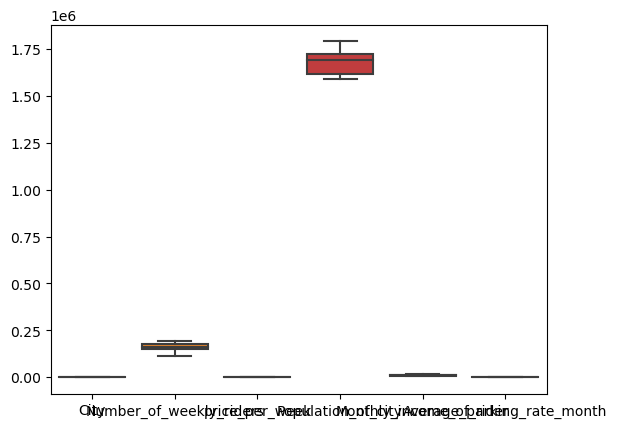

In [50]:
sns.boxplot(data=new)

### Missing Value

In [51]:
new.isna().sum()  

City                          0
Number_of_weekly_riders       0
price_per_week                0
Population_of_city            0
Monthly_income_of_rider       0
Average_parking_rate_month    0
dtype: int64

In [52]:
new.head()

,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider,Average_parking_rate_month
0,1,190400,15,1790000,6200,50
1,2,191200,15,1780000,6400,60
2,3,177600,25,1778000,6500,60
3,4,176800,25,1750000,6550,60
4,5,178400,25,1740000,6580,70


In [53]:
new.columns

Index(['City', 'Number_of_weekly_riders', 'price_per_week',
       'Population_of_city', 'Monthly_income_of_rider',
       'Average_parking_rate_month'],
      dtype='object')

In [54]:
new.Average_parking_rate_month = np.log(new.Average_parking_rate_month)

In [55]:
# Putting feature variable to X
X = new.drop('Average_parking_rate_month',axis=1)

# Putting response variable to y
y = new[['Average_parking_rate_month']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=100)

In [56]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Average_parking_rate_month,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider
6,4.317488,7,175200,30,1725000,8600
12,4.605170,13,161600,40,1695000,11600
4,4.248495,5,178400,25,1740000,6580
25,5.298317,26,152800,63,1610000,16200
0,3.912023,1,190400,15,1790000,6200


<AxesSubplot:title={'center':'Average_parking_rate_month vs City'}, xlabel='City', ylabel='Average_parking_rate_month'>

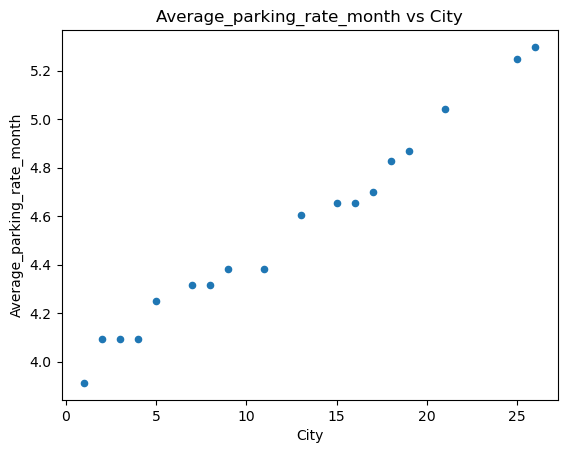

In [57]:
df.plot.scatter(x='City', y='Average_parking_rate_month', title='Average_parking_rate_month vs City')

In [58]:
df.corr()

,Average_parking_rate_month,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider
Average_parking_rate_month,1.000000,0.990796,-0.759305,0.821832,-0.948215,0.977139
City,0.990796,1.000000,-0.808000,0.859104,-0.970151,0.993810
Number_of_weekly_riders,-0.759305,-0.808000,1.000000,-0.964223,0.854954,-0.820027
price_per_week,0.821832,0.859104,-0.964223,1.000000,-0.880956,0.866903
Population_of_city,-0.948215,-0.970151,0.854954,-0.880956,1.000000,-0.966239
Monthly_income_of_rider,0.977139,0.993810,-0.820027,0.866903,-0.966239,1.000000


<AxesSubplot:>

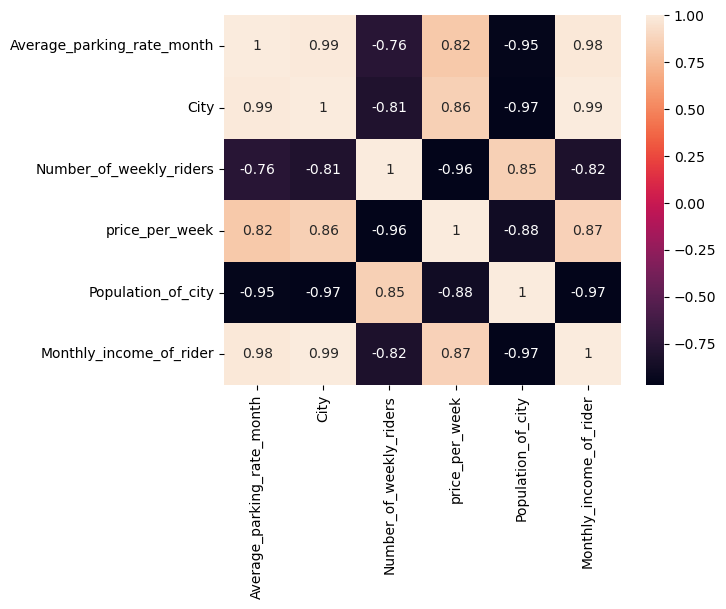

In [59]:
sns.heatmap(df.corr(),annot = True)

In [60]:
X1=df.drop(['Average_parking_rate_month'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

City                        344.004647
Number_of_weekly_riders    1296.921210
price_per_week               86.820639
Population_of_city         2016.147741
Monthly_income_of_rider     971.460614
dtype: float64

In [61]:
df =df = df.head().drop(['Monthly_income_of_rider'],axis=1) # axix=1  means column index
df.head()

,Average_parking_rate_month,City,Number_of_weekly_riders,price_per_week,Population_of_city
6,4.317488,7,175200,30,1725000
12,4.605170,13,161600,40,1695000
4,4.248495,5,178400,25,1740000
25,5.298317,26,152800,63,1610000
0,3.912023,1,190400,15,1790000


In [62]:
X1=df.drop(['Average_parking_rate_month'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

City                        488.448838
Number_of_weekly_riders    3533.289930
price_per_week             1224.206446
Population_of_city         4994.944428
dtype: float64

In [63]:
df =df = df.head().drop(['Population_of_city'],axis=1) # axix=1  means column index
df.head()

,Average_parking_rate_month,City,Number_of_weekly_riders,price_per_week
6,4.317488,7,175200,30
12,4.605170,13,161600,40
4,4.248495,5,178400,25
25,5.298317,26,152800,63
0,3.912023,1,190400,15


In [64]:
X1=df.drop(['Average_parking_rate_month'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

City                       304.592077
Number_of_weekly_riders     82.616828
price_per_week             608.189936
dtype: float64

In [65]:
df  = df.head().drop(['price_per_week'],axis=1) # axix=1  means column index
df.head()

,Average_parking_rate_month,City,Number_of_weekly_riders
6,4.317488,7,175200
12,4.605170,13,161600
4,4.248495,5,178400
25,5.298317,26,152800
0,3.912023,1,190400


In [66]:
X1=df.drop(['Average_parking_rate_month'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

City                       2.062802
Number_of_weekly_riders    2.062802
dtype: float64

 *H0 :- There is no Linear relationship between Average_parking_rate_month and City, Number_of_weekly_riders

                         Vs 

*  H1 :- There is  Linear relationship between Average_parking_rate_month and City, Number_of_weekly_riders


Alpha = 0.05 (5%)

In [67]:
import statsmodels.formula.api as smf
model = smf.ols('Average_parking_rate_month ~ City+Number_of_weekly_riders',data=df).fit()
model.summary()

C:\Users\sneha\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Average_parking_rate_month   R-squared:                       0.994
Model:                                    OLS   Adj. R-squared:                  0.988
Method:                         Least Squares   F-statistic:                     168.7
Date:                        Fri, 24 Feb 2023   Prob (F-statistic):            0.00589
Time:                                16:02:25   Log-Likelihood:                 9.5540
No. Observations:                           5   AIC:                            -13.11
Df Residuals:                               2   BIC:                            -14.28
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.8100      1.161      4.142      0.054      -0.186       9.806
City                        0.0465      0.009      4.949      0.038       0.006       0.087
Number_of_weekly_riders -4.762e-06   6.22e-06     -0.766      0.524   -3.15e-05     2.2e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.593
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.391
Skew:                           0.241   Prob(JB):                        0.822
Kurtosis:                       1.717   Cond. No.                     7.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
df = df.head().drop('Number_of_weekly_riders',axis=1) # axix=1  means column index
df.head()

,Average_parking_rate_month,City
6,4.317488,7
12,4.605170,13
4,4.248495,5
25,5.298317,26
0,3.912023,1


In [69]:
# removing the insignificant variable 
model2=smf.ols('Average_parking_rate_month ~ City',data=df).fit()
model2.summary()

C:\Users\sneha\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Average_parking_rate_month   R-squared:                       0.992
Model:                                    OLS   Adj. R-squared:                  0.990
Method:                         Least Squares   F-statistic:                     390.8
Date:                        Fri, 24 Feb 2023   Prob (F-statistic):           0.000283
Time:                                16:02:25   Log-Likelihood:                 8.9113
No. Observations:                           5   AIC:                            -13.82
Df Residuals:                               3   BIC:                            -14.60
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9214      0.037    107.103      0.000       3.805       4.038
City           0.0534      0.003     19.768      0.000       0.045       0.062
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.655
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.167
Skew:                          -0.053   Prob(JB):                        0.920
Kurtosis:                       2.111   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# There is Linear relationship between Average_parking_rate_month and City
# 97% is accuracy of model , so we say model is good fit 
# Y = 36.5506 +6.0047 * city

*Assumption of Model
*Linearity
*Normality
*Homoscedasicity
*Model Error has to be independently identificaly Distibuted

In [71]:
df.head()

,Average_parking_rate_month,City
6,4.317488,7
12,4.605170,13
4,4.248495,5
25,5.298317,26
0,3.912023,1


In [72]:
Y = 36.5506 +6.0047 * 26
Y

192.6728

In [73]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Average_parking_rate_month,City,fitted_value,residual
6,4.317488,7,4.294886,0.022602
12,4.605170,13,4.615026,-0.009856
4,4.248495,5,4.188173,0.060322
25,5.298317,26,5.308663,-0.010345
0,3.912023,1,3.974746,-0.062723


<AxesSubplot:title={'center':'Average_parking_rate_month vs City'}, xlabel='City', ylabel='Average_parking_rate_month'>

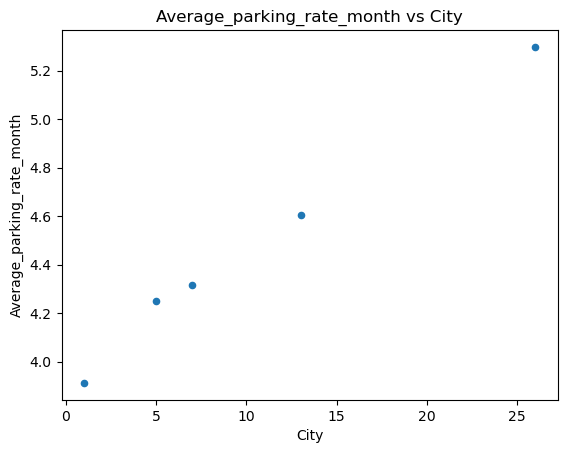

In [74]:
df.plot.scatter(x='City', y='Average_parking_rate_month', title='Average_parking_rate_month vs City')

### Normality

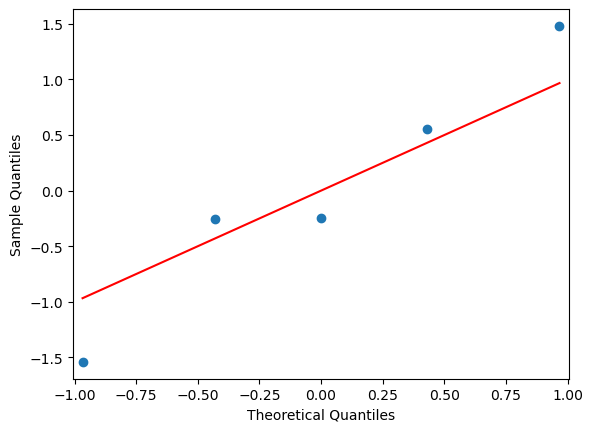

In [75]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') 
plt.show()

<AxesSubplot:ylabel='Frequency'>

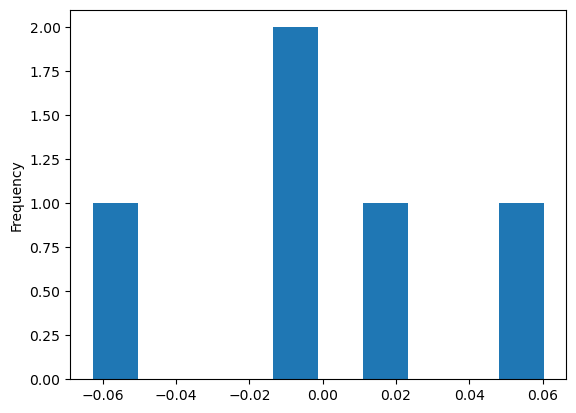

In [76]:
df['residual'].plot.hist()

### Prediction on Test Data

In [77]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider,Average_parking_rate_month
9,10,172800,30,1710000,9630,4.382027
22,23,123888,98,1595000,15200,5.164786
13,14,160800,40,1690000,11800,4.653960
11,12,161600,40,1695000,11330,4.442651
5,6,180800,25,1725000,8200,4.317488


In [78]:
df_test['Prediction']=model2.predict(df_test) 
df_test.head()

,City,Number_of_weekly_riders,price_per_week,Population_of_city,Monthly_income_of_rider,Average_parking_rate_month,Prediction
9,10,172800,30,1710000,9630,4.382027,4.454956
22,23,123888,98,1595000,15200,5.164786,5.148593
13,14,160800,40,1690000,11800,4.653960,4.668383
11,12,161600,40,1695000,11330,4.442651,4.561669
5,6,180800,25,1725000,8200,4.317488,4.241530


In [79]:
Y = 36.5506 +6.0047 * 14
Y

120.6164

In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Average_parking_rate_month, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.97


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Average_parking_rate_month, df.fitted_value)
print('R2 score for model Performance on train', np.round(r2,2))

R2 score for model Performance on train 0.99


In [82]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df['Average_parking_rate_month'], df['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 0.0407


In [83]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['Average_parking_rate_month'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 0.0589


In [84]:
d1 = {'Customer':pd.Series(['MANALI','SHIVAM','KOMAL']),
      'City': pd.Series([12, 21, 27]),
      'Number_of_weekly_riders':([161600, 170010, 193788])
     }
live = pd.DataFrame(d1)
live

,Customer,City,Number_of_weekly_riders
0,MANALI,12,161600
1,SHIVAM,21,170010
2,KOMAL,27,193788


In [85]:
live['future Prediction']=np.round(model.predict(live),2)
live

,Customer,City,Number_of_weekly_riders,future Prediction
0,MANALI,12,161600,4.60
1,SHIVAM,21,170010,4.98
2,KOMAL,27,193788,5.14
